<a href="https://colab.research.google.com/github/Kimsh1759/ERP_project/blob/master/AI_Contest_lab509.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install gluonnlp pandas tqdm   
!pip install mxnet
!pip install sentencepiece==0.1.91
!pip install transformers==4.8.2
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 344 kB 5.3 MB/s 
  Created wheel for gluonnlp: filename=gluonnlp-0.10.0-cp37-cp37m-linux_x86_64.whl size=595735 sha256=8b3aab9fc9ed17dc9ddc6fa07f7fdf7f6cc45cf0d8ad3d20b3b564fc2d27972c
  Stored in directory: /root/.cache/pip/wheels/be/b4/06/7f3fdfaf707e6b5e98b79c041e023acffbe395d78a527eae00
Successfully built gluonnlp
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 49.1 MB 2.0 MB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 4.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg

In [ ]:
!pip install 'git+https://github.com/SKTBrain/KoBERT.git#egg=kobert_tokenizer&subdirectory=kobert_hf'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/SKTBrain/KoBERT.git to /tmp/pip-install-bbap39e5/kobert-tokenizer_77f736d068d14d5ba8f5552e3496d9b3
  Running command git clone -q https://github.com/SKTBrain/KoBERT.git /tmp/pip-install-bbap39e5/kobert-tokenizer_77f736d068d14d5ba8f5552e3496d9b3
  Created wheel for kobert-tokenizer: filename=kobert_tokenizer-0.1-py3-none-any.whl size=4649 sha256=bf943d629404e813377363cc78efeaada2a1a9dcfe39fdbfa7b3538d9d163829
  Stored in directory: /tmp/pip-ephem-wheel-cache-ivrxa_my/wheels/10/b4/d9/cb627bbfaefa266657b0b4e8127f7bf96d27376fa1a23897b4
Successfully built kobert-tokenizer


In [ ]:
!pip install git+https://git@github.com/SKTBrain/KoBERT.git@master

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://****@github.com/SKTBrain/KoBERT.git (to revision master) to /tmp/pip-req-build-31e7bjkf
  Running command git clone -q 'https://****@github.com/SKTBrain/KoBERT.git' /tmp/pip-req-build-31e7bjkf
     |████████████████████████████████| 132 kB 5.0 MB/s 
     |████████████████████████████████| 4.5 MB 50.3 MB/s 
     |████████████████████████████████| 79 kB 9.0 MB/s 
     |████████████████████████████████| 9.0 MB 40.7 MB/s 
     |████████████████████████████████| 127 kB 40.3 MB/s 
  Created wheel for kobert: filename=kobert-0.2.3-py3-none-any.whl size=15674 sha256=fabb98749d5c02e748405ea33dff57c0ec106e0645a8c04e5d6b886e5ab1cb4f
  Stored in directory: /tmp/pip-ephem-wheel-cache-3i3ot1gu/wheels/d3/68/ca/334747dfb038313b49cf71f84832a33372f3470d9ddfd051c0
Successfully built kobert
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urll

In [ ]:
import pandas as pd
from glob import glob
import os
import numpy as np
from tqdm import tqdm, tqdm_notebook
import matplotlib.pyplot as plt

import torch
from torch import nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

import gluonnlp as nlp
from kobert.utils import get_tokenizer
from kobert.pytorch_kobert import get_pytorch_kobert_model
from transformers import AdamW

In [ ]:
train = open('/content/drive/MyDrive/data/dataaug.csv', 'rt', encoding='UTF8')
train = pd.read_csv(train, encoding='cp949')
test = pd.read_csv("/content/drive/MyDrive/data/test.csv", encoding='cp949')
sample = pd.read_csv("/content/drive/MyDrive/data/sample.csv", encoding='cp949')

In [ ]:
print(train.info(), end = "\n\n")
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52996 entries, 0 to 52995
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       52996 non-null  int64 
 1   premise     52996 non-null  object
 2   hypothesis  52996 non-null  object
 3   label       52996 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.6+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       5000 non-null   int64 
 1   premise     5000 non-null   object
 2   hypothesis  5000 non-null   object
dtypes: int64(1), object(2)
memory usage: 117.3+ KB
None


In [ ]:
train.head()


,index,premise,hypothesis,label
0,0,흡연자분들은 발코니가 있는 방이면 발코니에서 흡연이 가능합니다.,어떤 방에서도 흡연은 금지됩니다.,contradiction
1,1,10명이 함께 사용하기 불편함없이 만족했다.,10명이 함께 사용하기 불편함이 많았다.,contradiction
2,2,10명이 함께 사용하기 불편함없이 만족했다.,성인 10명이 함께 사용하기 불편함없이 없었다.,neutral
3,3,10명이 함께 사용하기 불편함없이 만족했다.,10명이 함께 사용하기에 만족스러웠다.,entailment
4,4,10층에 건물사람들만 이용하는 수영장과 썬베드들이 있구요.,건물사람들은 수영장과 썬베드를 이용할 수 있습니다.,entailment


In [ ]:
test.head()

,index,premise,hypothesis
0,1,진짜 사람하나 캐리어하나만 들어갈수있어요,캐리어는 들어갈 수 없어요.
1,2,그린 아메리카는 우선 대형 초콜릿 제조업체들을 대상으로 설득작업을 벌이고 있습니다.,초콜릿을 만드는 대형 제조업체가 존재한다.
2,3,또한 강연이 끝난 후 각 국의 업무 담당자들로부터 사전 접수한 질문과 함께 현장에서...,질의응답에 사전 접수된 질문은 답변이 제한된다.
3,4,수험생들은 각 상담부스에서 입시전문가나 입학사정관과 상담함으로써 수시모집 지원전략을...,수험생들은 입시전문가와 입학사정관에게 수시모집 지원전략에 대한 도움을 받을 수 있다.
4,5,콜린은 매우 친절하고 응답이 빠릅니다.,콜린이 숙소의 호스트입니다.


In [ ]:
train = train.dropna(how='any') # Null 값이 존재하는 행 제거
train = train.reset_index(drop=True)
print(train.isnull().values.any()) # Null 값이 존재하는지 확인

False


In [ ]:
test = test.dropna(how='any') # Null 값이 존재하는 행 제거
test = test.reset_index(drop=True)
print(test.isnull().values.any()) # Null 값이 존재하는지 확인

False


In [ ]:
print("(premise) 최대 길이:", train['premise'].map(len).max(), "최소 길이:", train['premise'].map(len).min())
print("(hypothesis) 최대 길이 :", train['hypothesis'].map(len).max(), "최소 길이:", train['hypothesis'].map(len).min())

print("(premise) 최대 길이 :", test['premise'].map(len).max(), "최소 길이:", test['premise'].map(len).min())
print("(hypothesis) 최대 길이 :", test['hypothesis'].map(len).max(), "최소 길이:", test['hypothesis'].map(len).min())

(premise) 최대 길이: 90 최소 길이: 19
(hypothesis) 최대 길이 : 103 최소 길이: 5
(premise) 최대 길이 : 90 최소 길이: 20
(hypothesis) 최대 길이 : 100 최소 길이: 6


In [ ]:
train_copy = train.copy()
train_copy['length'] = train_copy['premise'].str.len()
train_copy.head()

,index,premise,hypothesis,label,length
0,0,흡연자분들은 발코니가 있는 방이면 발코니에서 흡연이 가능합니다.,어떤 방에서도 흡연은 금지됩니다.,contradiction,35
1,1,10명이 함께 사용하기 불편함없이 만족했다.,10명이 함께 사용하기 불편함이 많았다.,contradiction,24
2,2,10명이 함께 사용하기 불편함없이 만족했다.,성인 10명이 함께 사용하기 불편함없이 없었다.,neutral,24
3,3,10명이 함께 사용하기 불편함없이 만족했다.,10명이 함께 사용하기에 만족스러웠다.,entailment,24
4,4,10층에 건물사람들만 이용하는 수영장과 썬베드들이 있구요.,건물사람들은 수영장과 썬베드를 이용할 수 있습니다.,entailment,32


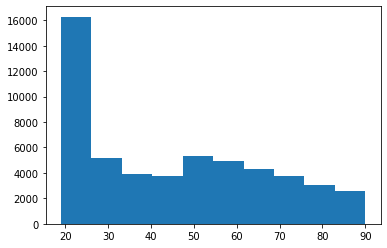

In [ ]:
%matplotlib inline
plt.hist(train_copy['length'])
plt.show()

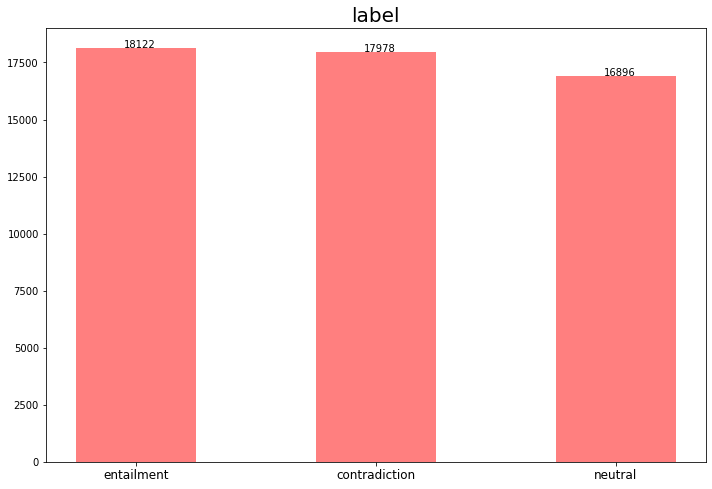

In [ ]:
feature = train['label']

plt.figure(figsize=(10, 7.5))
plt.title('label', fontsize = 20)

temp = feature.value_counts()
plt.bar(temp.keys(), temp.values, width=0.5, color='r', alpha=0.5)

plt.text(-0.05, temp.values[0]+20, s=temp.values[0])
plt.text(0.95, temp.values[1]+20, s=temp.values[1])
plt.text(1.95, temp.values[2]+20, s=temp.values[2])

plt.xticks(temp.keys(), fontsize=12) # x축 값, 폰트 크기 설정
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # 레이아웃 설정
plt.show() # 그래프 나타내기

In [ ]:
max_len = 70
batch_size = 128
warmup_ratio = 0.1
num_epochs = 10
max_grad_norm = 1
log_interval = 200
learning_rate = 5e-5

device = torch.device("cuda:0")

In [ ]:
bertmodel, vocab = get_pytorch_kobert_model(cachedir = ".cache")

tokenizer = get_tokenizer()
tok = nlp.data.BERTSPTokenizer(tokenizer, vocab, lower = False)

/content/.cache/kobert_v1.zip[██████████████████████████████████████████████████]
/content/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece[██████████████████████████████████████████████████]
using cached model. /content/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece


In [ ]:
class BERTDataset(Dataset):
    def __init__(self, dataset, sent_idx, label_idx, bert_tokenizer, max_len,
                pad, pair, mode = "train"):
        self.mode = mode
        transform = nlp.data.BERTSentenceTransform(bert_tokenizer, max_seq_length = max_len, pad = pad, pair = pair)
        if self.mode == "train":
            self.sentences = [transform([i[sent_idx]]) for i in dataset]
            self.labels = [np.int32(i[label_idx]) for i in dataset]
            
        else:
            self.sentences = [transform(i) for i in dataset]
        
    def __getitem__(self, i):
        if self.mode == 'train':
            return (self.sentences[i] + (self.labels[i], ))
        else:
            return self.sentences[i]
    
    def __len__(self):
        return (len(self.sentences))

In [ ]:
print(pd.unique(train["label"]))

label_dict = {"entailment" : 0, "contradiction" : 1, "neutral" : 2}

['contradiction' 'neutral' 'entailment']


In [ ]:
train["premise_"] = "[CLS]" + train["premise"] + "[SEP]"
train["hypothesis_"] = train["hypothesis"] + "[SEP]"

test["premise_"] = "[CLS]" + test["premise"] + "[SEP]"
test["hypothesis_"] = test["hypothesis"] + "[SEP]"

train["text_sum"] = train.premise_ + " " + train.hypothesis_
test["text_sum"] = test.premise_ + " " + test.hypothesis_

train_content = []
test_content = []

for i, text in enumerate(train.text_sum):
    train_content.append(list([text, str(label_dict[train.label[i]])]))
    
for i, text in enumerate(test.text_sum):
    test_content.append([text])
    
dataset_train = train_content[:41000]
dataset_valid = train_content[41000:]
dataset_test = test_content

data_train = BERTDataset(dataset_train, 0, 1, tok, max_len, True, False, mode = "train")
data_valid = BERTDataset(dataset_valid, 0, 1, tok, max_len, True, False, mode = "train")
data_test = BERTDataset(dataset_test, 0, 1, tok, max_len, True, False, mode = "test")

train_dataloader = torch.utils.data.DataLoader(data_train, batch_size = batch_size, num_workers = 5)
valid_dataloader = torch.utils.data.DataLoader(data_valid, batch_size = batch_size, num_workers = 5)
test_dataloader = torch.utils.data.DataLoader(data_test, batch_size = batch_size, num_workers = 5)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
class BERTClassifier(nn.Module):
    def __init__(self, bert, hidden_size = 768, num_classes=3, dr_rate=None, params=None):
        super(BERTClassifier, self).__init__()
        self.bert = bert
        self.dr_rate = dr_rate
                 
        self.classifier = nn.Linear(hidden_size , num_classes)
        if dr_rate:
            self.dropout = nn.Dropout(p=dr_rate)
    
    def gen_attention_mask(self, token_ids, valid_length):
        attention_mask = torch.zeros_like(token_ids)
        for i, v in enumerate(valid_length):
            attention_mask[i][:v] = 1
        return attention_mask.float()

    def forward(self, token_ids, valid_length, segment_ids):
        attention_mask = self.gen_attention_mask(token_ids, valid_length)
        
        _, pooler = self.bert(input_ids = token_ids, token_type_ids = segment_ids.long(), attention_mask = attention_mask.float().to(token_ids.device))
        if self.dr_rate:
            out = self.dropout(pooler)
        return self.classifier(out)

In [ ]:
model = BERTClassifier(bertmodel, dr_rate = 0.5).to(device)

no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]

optimizer = AdamW(optimizer_grouped_parameters, lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()

In [ ]:
def calc_accuracy(X,Y):
    max_vals, max_indices = torch.max(X, 1)
    train_acc = (max_indices == Y).sum().data.cpu().numpy()/max_indices.size()[0]
    return train_acc

In [ ]:
for e in range(num_epochs):
    train_acc = 0.0
    valid_acc = 0.0
    model.train()
    for batch_id, (token_ids, valid_length, segment_ids, label) in tqdm(enumerate(train_dataloader), total=len(train_dataloader)):
        optimizer.zero_grad()
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        loss = loss_fn(out, label)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)
        optimizer.step()
        train_acc += calc_accuracy(out, label)

    print("epoch {} train acc {}".format(e+1, train_acc / (batch_id+1)))
    model.eval()
    for batch_id, (token_ids, valid_length, segment_ids, label) in tqdm(enumerate(valid_dataloader), total=len(valid_dataloader)):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        valid_acc += calc_accuracy(out, label)
    print("epoch {} valid acc {}".format(e+1, valid_acc / (batch_id+1)))

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 321/321 [07:13<00:00,  1.35s/it]

epoch 1 train acc 0.5675038940809969



100%|██████████| 94/94 [00:46<00:00,  2.03it/s]

epoch 1 valid acc 0.7369333950046253



100%|██████████| 321/321 [07:36<00:00,  1.42s/it]

epoch 2 train acc 0.7662383177570093



100%|██████████| 94/94 [00:46<00:00,  2.00it/s]

epoch 2 valid acc 0.8042177382053654



100%|██████████| 321/321 [07:39<00:00,  1.43s/it]

epoch 3 train acc 0.8438376168224299



100%|██████████| 94/94 [00:46<00:00,  2.00it/s]

epoch 3 valid acc 0.8594834065679925



100%|██████████| 321/321 [07:39<00:00,  1.43s/it]

epoch 4 train acc 0.8888970015576324



100%|██████████| 94/94 [00:46<00:00,  2.00it/s]

epoch 4 valid acc 0.907652058279371



100%|██████████| 321/321 [07:39<00:00,  1.43s/it]

epoch 5 train acc 0.920268691588785



100%|██████████| 94/94 [00:46<00:00,  2.01it/s]

epoch 5 valid acc 0.9321194206753007



100%|██████████| 321/321 [07:39<00:00,  1.43s/it]

epoch 6 train acc 0.9410241433021808



100%|██████████| 94/94 [00:46<00:00,  2.00it/s]

epoch 6 valid acc 0.9440838922294172



100%|██████████| 321/321 [07:39<00:00,  1.43s/it]

epoch 7 train acc 0.949907515576324



100%|██████████| 94/94 [00:46<00:00,  2.00it/s]

epoch 7 valid acc 0.9492729532839963



100%|██████████| 321/321 [07:39<00:00,  1.43s/it]

epoch 8 train acc 0.9600564641744549



100%|██████████| 94/94 [00:46<00:00,  2.01it/s]

epoch 8 valid acc 0.9616891188714154



100%|██████████| 321/321 [07:39<00:00,  1.43s/it]

epoch 9 train acc 0.9602073598130841



100%|██████████| 94/94 [00:46<00:00,  2.00it/s]

epoch 9 valid acc 0.9636982539315448



100%|██████████| 321/321 [07:39<00:00,  1.43s/it]

epoch 10 train acc 0.9688960280373832



100%|██████████| 94/94 [00:46<00:00,  2.01it/s]

epoch 10 valid acc 0.9711457851526365


In [ ]:
result = []
model.eval()
with torch.no_grad():
    for batch_id, (token_ids, valid_length, segment_ids) in tqdm(enumerate(test_dataloader), total=len(test_dataloader)):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        result.append(model(token_ids, valid_length, segment_ids))

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 40/40 [00:19<00:00,  2.06it/s]


In [ ]:
result_ = []
for i in result:
    for j in i:
        result_.append(int(torch.argmax(j)))
        
out = [list(label_dict.keys())[_] for _ in result_]

lab509 = sample.copy()

lab509["label"] = out

lab509.to_csv("/content/drive/MyDrive/data/lab509.csv", index = False, encoding='cp949')

In [ ]:
lab509.head()


,index,label
0,1,contradiction
1,2,entailment
2,3,neutral
3,4,entailment
4,5,neutral
